In [21]:
import pandas as pd
import numpy as np

import datetime

# s = "8 March, 2017"
# d = datetime.strptime(s, '%d %B, %Y')
# print(d.strftime('%Y-%m-%d'))

In [117]:
cols = ['date','year', 'city', 'state', 'vic_age', 'dog_type']
data = pd.read_csv('/kaggle/input/fatal-dog-attacks-in-the-us-202022/dog_attacks.csv', parse_dates= {"Date" : ["year","date"]}, usecols = cols)
data

,Date,city,state,vic_age,dog_type
0,2020 January 8,Taos Pueblo,New Mexico,52 years,Pack of dogs
1,2020 January 9,Dayton,Ohio,4 months,Pit bull-type dog
2,2020 January 10,Rockcastle County,Kentucky,55 years,Pit bull
3,2020 January 25,Lafayette,Indiana,1 month,Pit bull mix
4,2020 January 30,Attala County,Mississippi,76 years,2 pit bulls and 2 mixed breeds
...,...,...,...,...,...
104,2022 August 15,Rossie,Iowa,43 years,5 Great Danes
105,2022 August 21,Putnam,Florida,61 years,Pack of 5 dogs
106,2022 October 5,Memphis,Tennessee,5 months; two years,Pit bulls (2)
107,2022 October 7,Baldy Mesa,California,80 years,2 Dogo Argentinos


In [122]:
# data.query('Date == "2020 November 17–18"').index


Int64Index([], dtype='int64')

In [149]:
def preprocess_inputs(df):
    df = df.copy()

#     df['date'] = df['date'].apply(date_convert)
    

    bad_row = data.query('Date == "2020 November 17–18"').index
#     bad_dog_rows = ['<unspecified> (4)', '<unspecified>', '<unspecified> (5+)','<unreleased> (4)', '<undisclosed>', 'unknown breed', '<unknown> (1+)']
#     bad_dog_index = []
#     for bd in bad_dog_rows:
#         bad_dog_index.append(bd.index)
        
    df = df.drop(bad_row, axis = 0)
#     df = df.drop(bad_dog_index, axis = 0)
    df['Date'] = pd.to_datetime(df['Date'])
    df.dog_type = df.dog_type.str.lower()
    df.dog_type = df.dog_type.apply(lambda x: 'pit bull' if 'pit' in x else x)
    df.dog_type = df.dog_type.apply(lambda x: 'pack' if 'pack' in x else x)
    df.vic_age = df.vic_age.apply(lambda x: 'undisclosed' if 'undisclosed' in x else x)
    undisclosed = df.query('vic_age == "undisclosed"').index
    df = df.drop(undisclosed, axis = 0)
    df.vic_age = df.vic_age.apply(lambda x: '0 years' if 'months' in x else x)
    df.vic_age = df.vic_age.apply(lambda x: '0 years' if 'month' in x else x)
    df.vic_age = df.vic_age.str.split(' ').str[0]
    df.vic_age = pd.to_numeric(df.vic_age)
    
    
    return df

In [150]:
X = preprocess_inputs(data)
X

,Date,city,state,vic_age,dog_type
0,2020-01-08,Taos Pueblo,New Mexico,52,pack
1,2020-01-09,Dayton,Ohio,0,pit bull
2,2020-01-10,Rockcastle County,Kentucky,55,pit bull
3,2020-01-25,Lafayette,Indiana,0,pit bull
4,2020-01-30,Attala County,Mississippi,76,pit bull
...,...,...,...,...,...
103,2022-08-05,Castaic,California,62,cane corso
104,2022-08-15,Rossie,Iowa,43,5 great danes
105,2022-08-21,Putnam,Florida,61,pack
106,2022-10-05,Memphis,Tennessee,0,pit bull


In [151]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 107
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      103 non-null    datetime64[ns]
 1   city      103 non-null    object        
 2   state     103 non-null    object        
 3   vic_age   103 non-null    int64         
 4   dog_type  103 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 4.8+ KB


<AxesSubplot:>

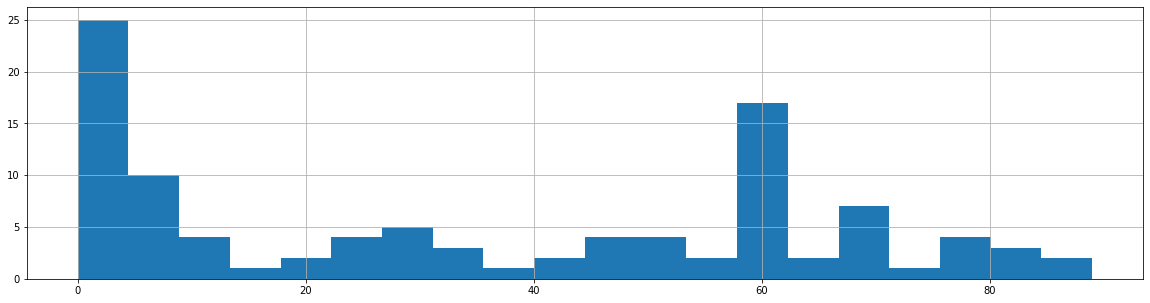

In [154]:
plt.figure(figsize=(20, 5))
X.vic_age.hist(bins = 20)

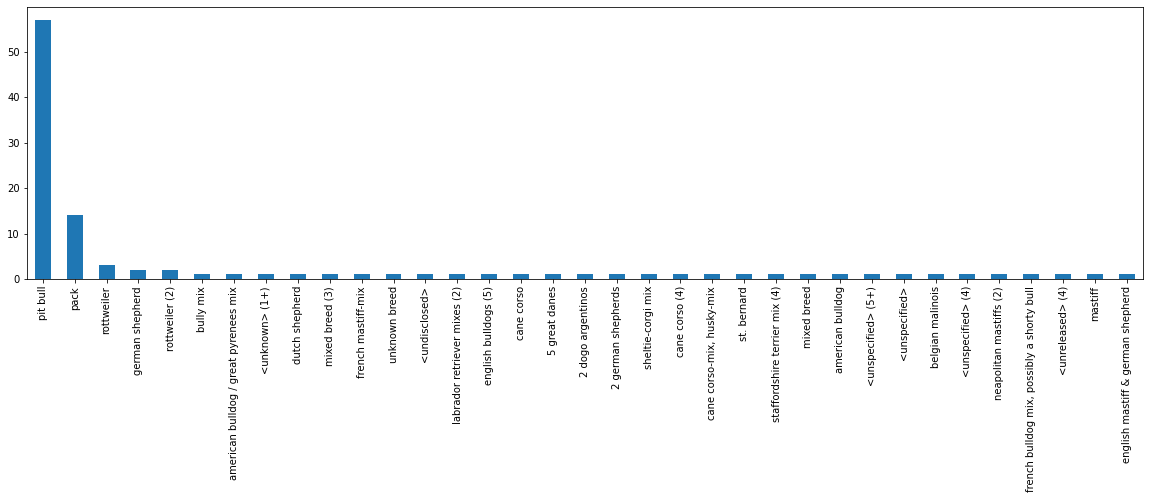

In [95]:
import matplotlib.pyplot as plt
# plt.figure(figsize = 10, 10)
plt.figure(figsize=(20, 5))
X.dog_type.value_counts().plot(kind = 'bar');

In [92]:
X.dog_type.unique()

array(['pack', 'pit bull', 'mastiff', '<unreleased> (4)',
       'french bulldog mix, possibly a shorty bull',
       'neapolitan mastiffs (2)', '<unspecified> (4)', 'belgian malinois',
       '<unspecified>', '<unspecified> (5+)', 'german shepherd',
       'american bulldog', 'mixed breed', 'rottweiler (2)',
       'staffordshire terrier mix (4)', 'rottweiler', 'st. bernard',
       'sheltie-corgi mix', 'cane corso-mix, husky-mix', 'cane corso (4)',
       'french mastiff-mix', '2 german shepherds', 'bully mix',
       'american bulldog / great pyrenees mix', '<unknown> (1+)',
       'dutch shepherd', 'mixed breed (3)', 'unknown breed',
       '<undisclosed>', 'labrador retriever mixes (2)',
       'english bulldogs (5)', 'cane corso', '5 great danes',
       '2 dogo argentinos', 'english mastiff & german shepherd'],
      dtype=object)

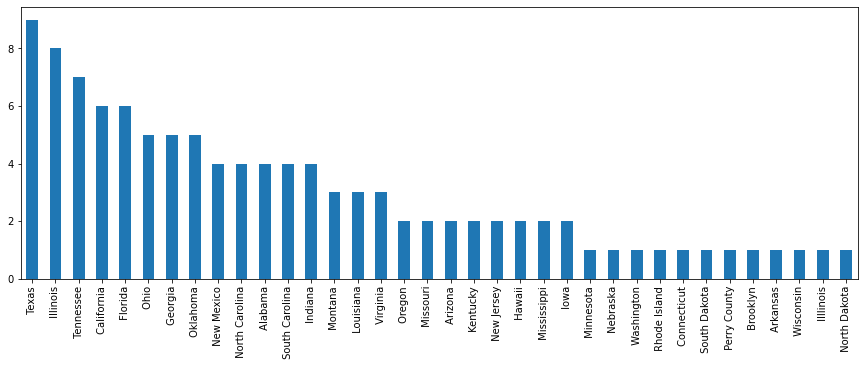

In [74]:
plt.figure(figsize=(15, 5))
X.state.value_counts().plot(kind = 'bar');

In [128]:
X.vic_age.unique()

array(['52 years', '0 years', '55 years', '1 month', '76 years',
       '5 years', '25 years', '13 years', '64 years', '60 years',
       '2 years', '70 years', '59 years', '62 years', '9 years',
       '11 years', '6 weeks', '72 years', '1 year', '61 years',
       '84 years', '32 years', '27 years', '36 years', '26 years',
       '14 years', '46 years', '6 years', '3 years', '7 years', '4 years',
       '53 years', '28 years', '77 years', '22 years', '31 years',
       '85 years', '89 years', '42 years', '21 years', '69 years',
       '8 days', '48 years', '58 years', '35 years', '34 years',
       '71 years', '66 years', '57 years', '43 years', '80 years'],
      dtype=object)

In [130]:
X.vic_age.str.split(' ')[1]

['0', 'years']

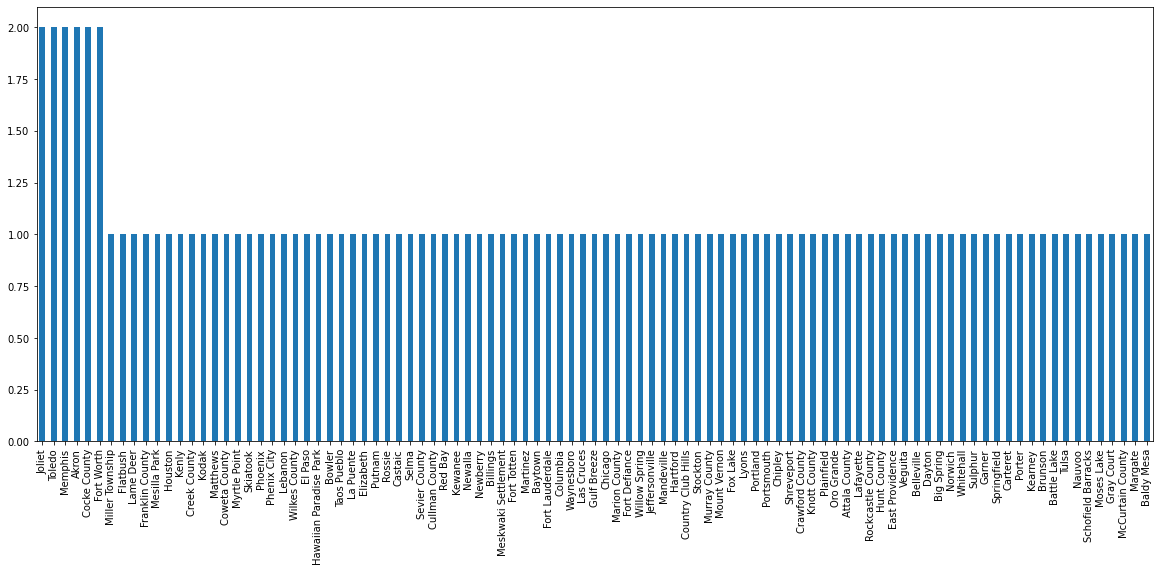

In [158]:
plt.figure(figsize=(20, 8))
X.city.value_counts().plot(kind = 'bar');